## Data Collection & visualisation

### Downloading Data
The Environment Agency has approximately 1000 real time rain gauges which are connected by telemetry. Measurements of the amount of precipitation (mm) are captured in Tipping Bucket Raingauges (TBR).
 
 To find a rain guage station ID go to: https://environment.data.gov.uk/flood-monitoring/assets/demo/index.html
 
 For more infomation about the API go to: https://environment.data.gov.uk/flood-monitoring/doc/rainfall
 
 This will take a bit of editing to workfor you but it lets you see rainfall data from the last month for a particular station, I'm sure there are ways to make it better

(-0.1, 1.8)

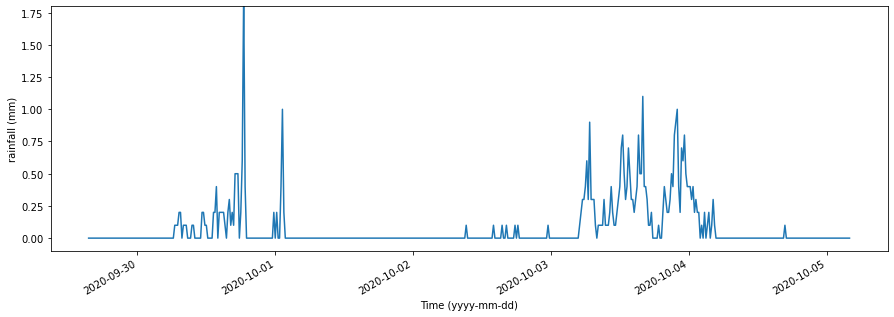

In [32]:
import urllib.request
import pandas as pd
import matplotlib as plt
import os

#python script to obtain the last months rainfall data
#connects to the government rainfall data API and obtains most recent data

station_id = "582191"
output_folder = 2

url_pt_1 = "https://environment.data.gov.uk/flood-monitoring/id/stations/"
url_pt_2 = station_id
url_pt_3 = "/readings?parameter=rainfall&_limit=10000"
url = url_pt_1 + url_pt_2 + url_pt_3 
response = urllib.request.urlopen(url)
raw_json = response.read().decode() 

#the following code edits the json file so it can be put into a pandas data frame
#there is definitely a better way of doing this...
a_file= open(r"C:\Users\blhal\OneDrive\Desktop\myfile.txt","w+")
a_file.writelines(raw_json) #writes data to a text file

#cuts off first 18 lines of meta data from the file
for x in range(0, 18): 
    
    a_file = open(r"C:\Users\blhal\OneDrive\Desktop\myfile.txt", "r")

    lines = a_file.readlines()
    a_file.close()

    del lines[0]

    new_file = open(r"C:\Users\blhal\OneDrive\Desktop\myfile.txt","w+")

    for line in lines:
        new_file.write(line)

    new_file.close()

#cuts off last line as it contains a '}'    
with open(r"C:\Users\blhal\OneDrive\Desktop\myfile.txt") as f1:
    lines = f1.readlines()

with open(r"C:\Users\blhal\OneDrive\Desktop\myfile.txt", 'w') as f2:
    f2.writelines(lines[:-2])
    
#these lines of code insert a "[" onto the first line
with open(r"C:\Users\blhal\OneDrive\Desktop\myfile.txt") as f: 
    lines = f.readlines() #read 
 
lines[0] = "[{\n" #you can replace zero with any line number. 
 
with open(r"C:\Users\blhal\OneDrive\Desktop\myfile.txt", "w") as f: 
    f.writelines(lines) #write back 

#converst the .txt file extention to a .json file extention
    
from pathlib import Path
p = Path(r"C:\Users\blhal\OneDrive\Desktop\myfile.txt")
p.rename(p.with_suffix('.json'))

#creates a pandas data fram containing all the data
df = pd.read_json(r'C:\Users\blhal\OneDrive\Desktop\myfile.json')

#writes pandas data frame to a .csv file
df.to_csv(r'C:\Users\blhal\OneDrive\Desktop\File Name.csv', index = False)

os.remove(r"C:\Users\blhal\OneDrive\Desktop\myfile.json")

#allows trunication of the data set so you can crudely zoom in on certian sections

df = df.iloc[2100:2600]

ax = df.plot(x='dateTime', y='value',figsize=(15,5))
ax.set_xlabel("Time (yyyy-mm-dd)")
ax.set_ylabel("rainfall (mm)")
ax.get_legend().remove()
ax.set_ylim([-0.1,1.8])
#automatically removes the json file after it is created so that the code can be re-run